# Tutorial - Time Series Forecasting - Simple average

The goal is to forecast time series with the Simple Average Approach. 1) JetRail Commuter, 2) Air Passengers, 3) Simple Average - Last 2 months, 4) Function Simple Average with Air Passengers, and 5) Function Simple Average with Wine Sales.

References Analytics Vidhya - https://www.analyticsvidhya.com/blog/2018/02/time-series-forecasting-methods/

In [107]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import datetime

In [108]:
# Load File
url = 'https://raw.githubusercontent.com/tristanga/Machine-Learning/master/Data/JetRail%20Avg%20Hourly%20Traffic%20Data%20-%202012-2013.csv'
df = pd.read_csv(url)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494 entries, 0 to 493
Data columns (total 3 columns):
Datetime    494 non-null object
ID          494 non-null float64
Count       494 non-null float64
dtypes: float64(2), object(1)
memory usage: 11.7+ KB


In [109]:
df.Datetime = pd.to_datetime(df.Datetime,format='%Y-%m-%d %H:%M') 
df.index = df.Datetime

# Simple Average Approach with JetRail 

This method consists of taking all the values previously known then calculating the average and taking it as the next value. In certain situations it can works surprisingly well. 

In [110]:
#Split Train Test
import math
total_size=len(df)
split = 10392 / 11856
train_size=math.floor(split*total_size)
train=df.head(train_size)
test=df.tail(len(df) -train_size)

In [111]:
# Create prediction table
y_hat = test.copy()
# Create Simple Average
y_hat['simple_avg'] = train['Count'].mean()

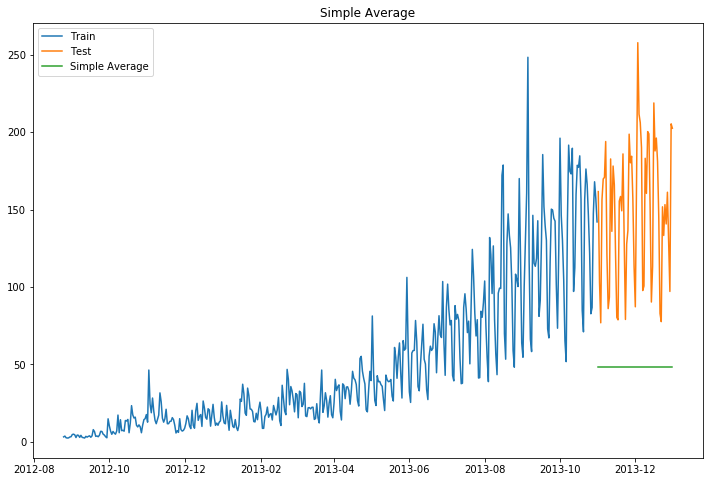

In [112]:
#Plotting data
plt.figure(figsize=(12,8))
plt.plot(train.index, train['Count'], label='Train')
plt.plot(test.index,test['Count'], label='Test')
plt.plot(y_hat.index,y_hat['simple_avg'], label='Simple Average')
plt.legend(loc='best')
plt.title("Simple Average")
plt.show()

# RMSE Calculation

In [113]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(test.Count, y_hat.simple_avg))
print('RMSE = '+str(rms))

RMSE = 109.8852652708286


# Simple Average - Last 2 Months

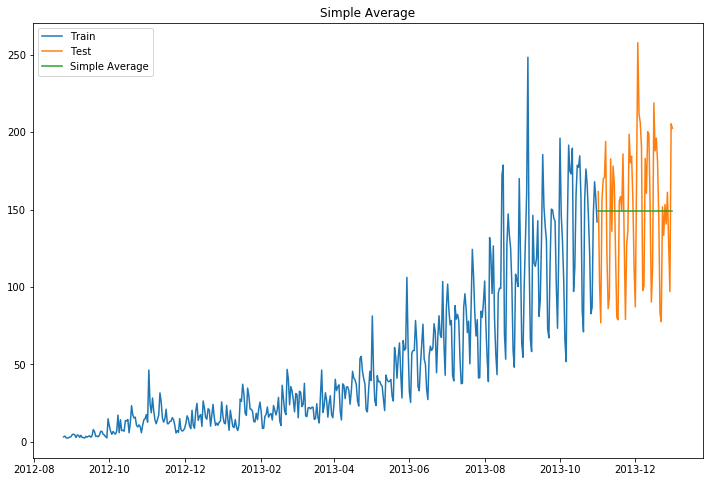

RMSE = 43.30072824651579


In [114]:
dflast2months=train.tail(len(test))
# Create prediction table
y_hat = test.copy()
# Create Simple Average
dflast2months=df.tail(len(test))
y_hat['simple_avg'] = dflast2months['Count'].mean()
#Plotting data
plt.figure(figsize=(12,8))
plt.plot(train.index, train['Count'], label='Train')
plt.plot(test.index,test['Count'], label='Test')
plt.plot(y_hat.index,y_hat['simple_avg'], label='Simple Average')
plt.legend(loc='best')
plt.title("Simple Average")
plt.show()
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(test.Count, y_hat.simple_avg))
print('RMSE = '+str(rms))

# Simple Average Approach with Air Passagers

In [127]:
# Subsetting
url = 'https://raw.githubusercontent.com/tristanga/Machine-Learning/master/Data/International%20Airline%20Passengers.csv'
df = pd.read_csv(url, sep =";")
df.info()
df.Month = pd.to_datetime(df.Month,format='%Y-%m')
df.index = df.Month
df = df.drop(['Month'], axis=1)
#df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
Month         144 non-null object
Passengers    144 non-null int64
dtypes: int64(1), object(1)
memory usage: 2.3+ KB


In [128]:
#Creating train and test set 
import math
total_size=len(df)
train_size=math.floor(0.7*total_size) #(70% Dataset)
train=df.head(train_size)
test=df.tail(len(df) -train_size)
#train.info()
#test.info()

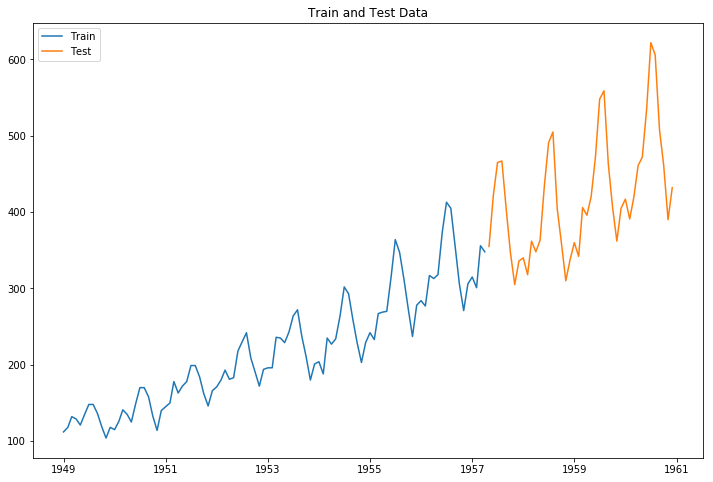

In [129]:
#Plotting data
plt.figure(figsize=(12,8))
plt.title("Train and Test Data")
plt.plot(train.index, train['Passengers'], label='Train')
plt.plot(test.index,test['Passengers'], label='Test')
plt.legend(loc='best')
plt.show()

In [130]:
y_hat = test.copy()
y_hat['simple_avg'] = train['Passengers'].mean()
y_hat.describe()

,Passengers,simple_avg
count,44.000000,44.00
mean,421.068182,218.36
std,77.330279,0.00
min,305.000000,218.36
25%,359.750000,218.36
50%,406.500000,218.36
75%,465.500000,218.36
max,622.000000,218.36


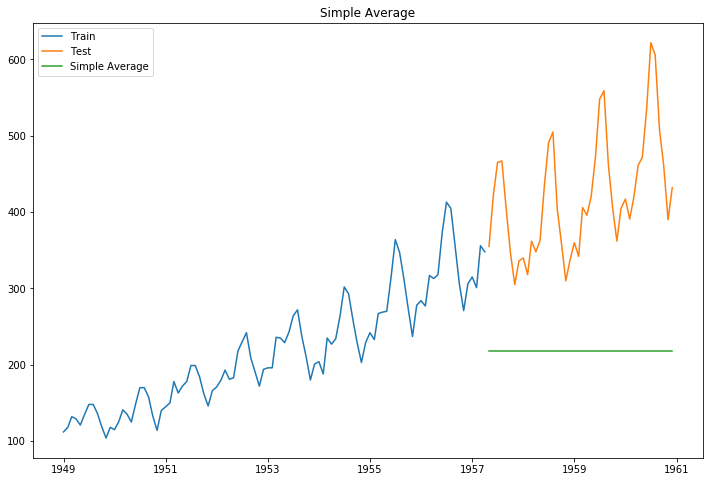

In [131]:
plt.figure(figsize=(12,8))
plt.plot(train.index, train['Passengers'], label='Train')
plt.plot(test.index,test['Passengers'], label='Test')
plt.plot(y_hat.index,y_hat['simple_avg'], label='Simple Average')
plt.legend(loc='best')
plt.title("Simple Average")
plt.show()

In [132]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(test.Passengers, y_hat.simple_avg))
print(rms)

216.64411025710095


# Function Simple Average Approach

In [133]:
def simple_avg_forecasting(mydf,colval,split):
    #print(split)
    import math
    global y_hat, train, test
    total_size=len(mydf)
    train_size=math.floor(split*total_size) #(70% Dataset)
    train=mydf.head(train_size)
    test=mydf.tail(len(mydf) -train_size)
    dd = np.asarray(train[colval])
    y_hat = test.copy()
    y_hat['simple_avg'] = train[colval].mean()
    from sklearn.metrics import mean_squared_error
    from math import sqrt
    plt.figure(figsize=(12,8))
    plt.plot(train.index, train[colval], label='Train')
    plt.plot(test.index,test[colval], label='Test')
    plt.plot(y_hat.index,y_hat['simple_avg'], label='Simple Average')
    plt.legend(loc='best')
    plt.title("Simple Average Forecast")
    plt.show()
    rms = sqrt(mean_squared_error(test[colval], y_hat.simple_avg))
    print('RMSE = '+str(rms))

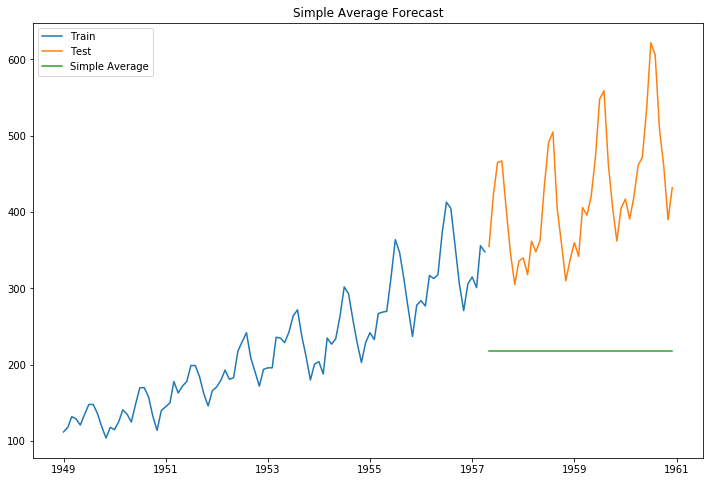

RMSE = 216.64411025710095


In [134]:
simple_avg_forecasting(df,'Passengers',0.7)

# Testing Function Simple Average Approach with Wine Dataset

In [123]:
url = 'https://raw.githubusercontent.com/tristanga/Data-Cleaning/master/Converting%20Time%20Series/Wine_Sales_R_Dataset.csv'
df = pd.read_csv(url)
df.info()
df.Date = pd.to_datetime(df.Date,format='%Y-%m-%d')
df.index = df.Date
df = df.drop(['Date'], axis=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176 entries, 0 to 175
Data columns (total 2 columns):
Date     176 non-null object
Sales    176 non-null int64
dtypes: int64(1), object(1)
memory usage: 2.8+ KB


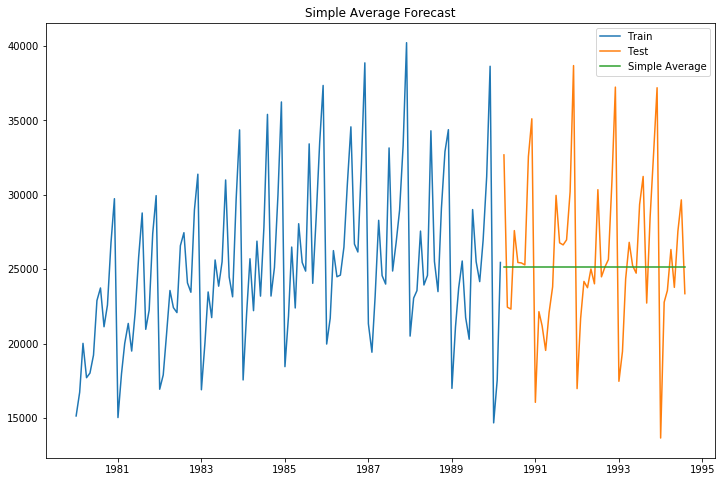

RMSE = 5240.003204481614


In [124]:
simple_avg_forecasting(df,'Sales',0.7)